<h1 align="center">Binary Prediction of Poisonous Mushrooms</h1>

### Project Structre
1. [About the Task](#1)
2. [Importing Libraries](#2)

<h3 align="left">1. About The Task</h3> <a id= 1 ></a>
    
**Task**: We need to develop Classification Model to help us classify mushrroms into 2 categories edible ('e') or poisonous ('p') based on a set of physical attributes provided in the dataset.

**Dataset**: Training Dataset (train.csv): Contains features along with the target variable, indicating whether each mushroom is edible or poisonous.Test Dataset (test.csv): Contains the features but requires predictions for whether the mushrooms are edible or poisonous.Additional Information:
    
**Evaluation**: The performance of the model is evaluated using the Matthews correlation coefficient (MCC), a metric that balances true and false positives and negatives, providing a measure of the quality of binary classifications.

The dataset was generated from a deep learning model trained on the UCI Mushroom dataset.

<h3 align="left">2. Importing Libraires & Data</h3> <a id= 2 ></a>

In [37]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, matthews_corrcoef
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import gc
import lightgbm as lgb
import seaborn as sns
import math

In [2]:
# Data
df_sub=pd.read_csv("/kaggle/input/playground-series-s4e8/sample_submission.csv")
df_train=pd.read_csv("/kaggle/input/playground-series-s4e8/train.csv")
df_test=pd.read_csv("/kaggle/input/playground-series-s4e8/test.csv")

<h3 align="left">3. EDA</h3> <a id= 2 ></a>

In [3]:
df_train.columns, df_test.columns

(Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
        'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
        'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
        'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
        'habitat', 'season'],
       dtype='object'),
 Index(['id', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
        'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
        'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
        'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
        'habitat', 'season'],
       dtype='object'))

In [4]:
# Info abou the data
df_train.info()
## This shows we have multiple Categorical features in our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [5]:
categorical_columns = df_train.select_dtypes(include=['object']).columns
unique_values = {col: df_train[col].nunique() for col in categorical_columns}
print("In Train Data")
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")

In Train Data
class: 2 unique values
cap-shape: 74 unique values
cap-surface: 83 unique values
cap-color: 78 unique values
does-bruise-or-bleed: 26 unique values
gill-attachment: 78 unique values
gill-spacing: 48 unique values
gill-color: 63 unique values
stem-root: 38 unique values
stem-surface: 60 unique values
stem-color: 59 unique values
veil-type: 22 unique values
veil-color: 24 unique values
has-ring: 23 unique values
ring-type: 40 unique values
spore-print-color: 32 unique values
habitat: 52 unique values
season: 4 unique values


In [6]:
categorical_columns = df_test.select_dtypes(include=['object']).columns
unique_values = {col: df_test[col].nunique() for col in categorical_columns}
print("In Test Data")
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")

In Test Data
cap-shape: 62 unique values
cap-surface: 59 unique values
cap-color: 57 unique values
does-bruise-or-bleed: 22 unique values
gill-attachment: 66 unique values
gill-spacing: 35 unique values
gill-color: 56 unique values
stem-root: 31 unique values
stem-surface: 54 unique values
stem-color: 55 unique values
veil-type: 15 unique values
veil-color: 23 unique values
has-ring: 23 unique values
ring-type: 36 unique values
spore-print-color: 33 unique values
habitat: 39 unique values
season: 4 unique values


In [7]:
# Checking Num of Misisng rows in data
print("% Missing In Train data")
print("\t",(df_train.isna().sum()/df_train.shape[0])*100)

% Missing In Train data
	 id                       0.000000
class                    0.000000
cap-diameter             0.000128
cap-shape                0.001283
cap-surface             21.528227
cap-color                0.000385
does-bruise-or-bleed     0.000257
gill-attachment         16.809280
gill-spacing            40.373988
gill-color               0.001829
stem-height              0.000000
stem-width               0.000000
stem-root               88.452732
stem-surface            63.551362
stem-color               0.001219
veil-type               94.884350
veil-color              87.936970
has-ring                 0.000770
ring-type                4.134818
spore-print-color       91.425482
habitat                  0.001444
season                   0.000000
dtype: float64


In [8]:
print("% Missing In Test Data")
print("\t",(df_test.isna().sum()/df_test.shape[0])*100)

% Missing In Test Data
	 id                       0.000000
cap-diameter             0.000337
cap-shape                0.001492
cap-surface             21.506821
cap-color                0.000626
does-bruise-or-bleed     0.000481
gill-attachment         16.834796
gill-spacing            40.404694
gill-color               0.002358
stem-height              0.000048
stem-width               0.000000
stem-root               88.452543
stem-surface            63.595327
stem-color               0.001011
veil-type               94.878689
veil-color              87.880445
has-ring                 0.000914
ring-type                4.148051
spore-print-color       91.417224
habitat                  0.001203
season                   0.000000
dtype: float64


In [9]:
# We have lots of Missing values. We can drop columns whihc are >75% missing in bith train and test
# stem-root, veil-type, veil-color, spore-print-color 
df_train_filt = df_train.drop(['stem-root', 'veil-type', 'veil-color', 'spore-print-color'],axis=1)
df_test_filt = df_test.drop(['stem-root', 'veil-type', 'veil-color', 'spore-print-color'],axis=1)

In [10]:
# Chacking the Distribution of Categorical columns
def visualize_categorical_distributions(df):
    """
    Visualizes the distribution of categorical features in the DataFrame.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the categorical features to visualize.
    
    Returns:
    - None: Displays the plots.
    """
    # Identify categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns

    # Set up the figure for multiple subplots
    num_cols = 3  # Number of columns for the subplot grid
    num_rows = math.ceil(len(categorical_columns) / num_cols)  # Calculate number of rows needed

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
    fig.suptitle('Distribution of Unique Values in Categorical Columns', fontsize=20)


    # Iterate over each categorical column and create a bar plot
    for i, col in enumerate(categorical_columns):
        row = i // num_cols
        col_pos = i % num_cols
        value_counts = df[col].value_counts()    
        axs[row, col_pos].bar(value_counts.index, value_counts.values, color=plt.cm.tab20.colors)
        axs[row, col_pos].set_title(col)
        axs[row, col_pos].tick_params(axis='x', rotation=90)
        axs[row, col_pos].set_ylabel('Count')
        axs[row, col_pos].set_xlabel('Category')

    # Remove unused axes
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the main title space
    plt.show()

In [11]:
visualize_categorical_distributions(df_train_filt)

From above plot we can see that there are many classes in a cat feature which are very low in terms of row counts

Handling Low-Frequency Categories


We will create a function to consolidate categories with frequencies below 100 into a single "Other" class across all categorical columns in both training and test datasets. By maintaining consistent mappings for low-frequency categories, we ensure model reliability and prevent data leakage between training and testing phases. This transformation simplifies our feature space and improves model stability

In [12]:
def categorize_low_frequency_values(df_train, df_test, threshold=100):
    """
    Replaces categories with less than a given threshold in all categorical columns 
    with the category 'Other', applying the same transformation to both training and test datasets.
    
    Parameters:
    - df_train (pd.DataFrame): The training DataFrame.
    - df_test (pd.DataFrame): The test DataFrame.
    - threshold (int): Frequency threshold below which categories are replaced with 'Other'.

    Returns:
    - df_train (pd.DataFrame): Modified training DataFrame.
    - df_test (pd.DataFrame): Modified test DataFrame.
    - mapping_dict (dict): Dictionary containing the mappings of replaced values for each column.
    """
    mapping_dict = {}
    
    # Identify categorical columns
    categorical_columns = df_train.select_dtypes(include=['object']).columns

    for col in categorical_columns:
        # Find values to replace
        value_counts = df_train[col].value_counts()
        values_to_replace = value_counts[value_counts < threshold].index
        
        # Determine the mode of the column
        mode_value = df_train[col].mode()[0]
        
        # Create mapping for the current column if there are values to replace
        if len(values_to_replace) > 0:
            # Store the mapping of original values to the mode
            mapping_dict[col] = {value: mode_value for value in values_to_replace}
            
            # Replace in training and test data
            df_train[col] = df_train[col].replace(values_to_replace, mode_value)
            df_test[col] = df_test[col].replace(values_to_replace, mode_value)

    return df_train, df_test, mapping_dict

In [13]:
df_train_filt, df_test_filt, mappings_dict = categorize_low_frequency_values(df_train_filt, df_test_filt)

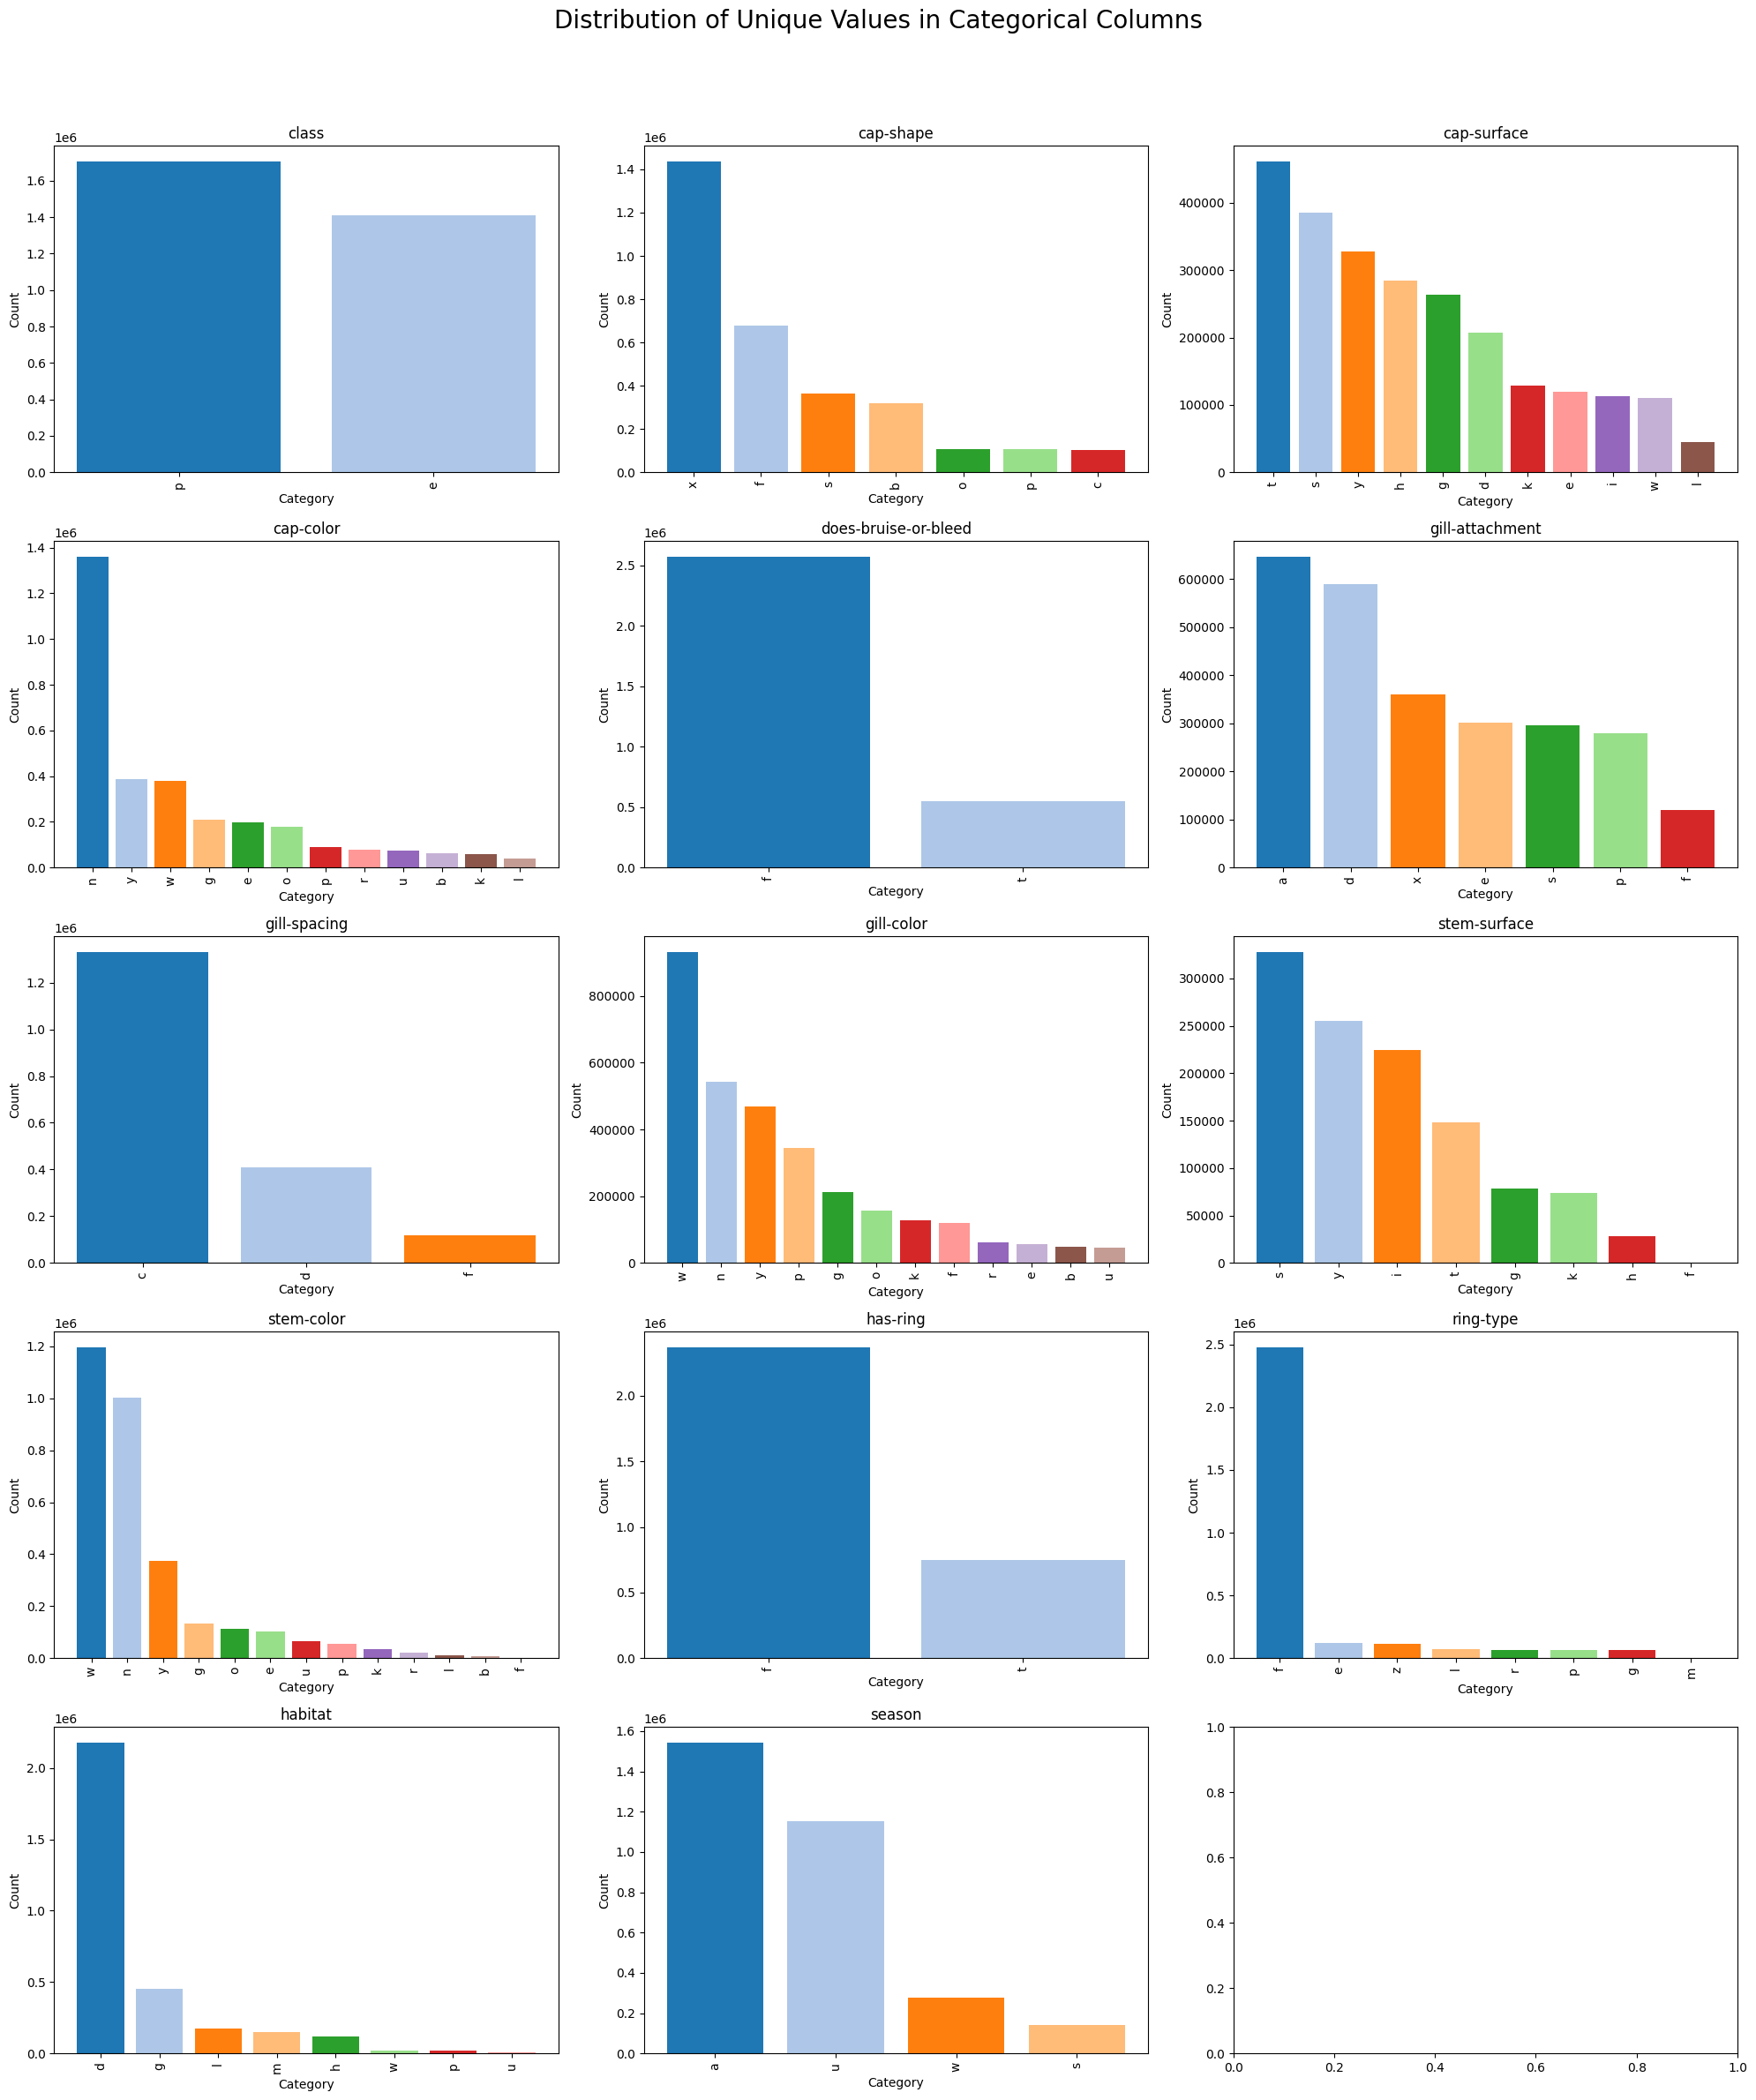

In [14]:
visualize_categorical_distributions(df_train_filt)

In [15]:
# Checking Num of Misisng rows in data
print("% Missing In Train data")
print("\t",(df_train_filt.isna().sum()/df_train_filt.shape[0])*100)

% Missing In Train data
	 id                       0.000000
class                    0.000000
cap-diameter             0.000128
cap-shape                0.001283
cap-surface             21.528227
cap-color                0.000385
does-bruise-or-bleed     0.000257
gill-attachment         16.809280
gill-spacing            40.373988
gill-color               0.001829
stem-height              0.000000
stem-width               0.000000
stem-surface            63.551362
stem-color               0.001219
has-ring                 0.000770
ring-type                4.134818
habitat                  0.001444
season                   0.000000
dtype: float64


In [16]:
#Handling Missing Data
## We can use Mean, Medial, Mode or some Encoding techniques (ordinal, frequency etc) or other algorithm (like KNN)
### Here, we will use the frequency encoding combined with KNN

In [17]:
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoding_maps = {}
    
    def fit(self, X, y=None):
        """
        Get the Frequency of a specified column
        
        Returns:
        self
        """
        for column in X.columns:
            freq_encoding = X[column].value_counts() / len(X)
            self.encoding_maps[column] = freq_encoding.to_dict()
        return self

    def transform(self, X):
        """
        Applies frequency encoding to the columns of the DataFrame.
        
        Args:
        X (pd.DataFrame): DataFrame to transform.

        Returns:
        pd.DataFrame: Transformed DataFrame.
        """
        X_transformed = X.copy()
        for column in X.columns:
            encoding_map = self.encoding_maps.get(column, {})
            X_transformed[column] = X_transformed[column].map(lambda x: encoding_map.get(x, -1))
        return X_transformed

In [18]:
def handle_missing_data(train, test, n_neign = 5):
    """
    Handles teh Missing data in both Train and test datasets.
    1. Apply Frequency Encoding to assigns a value based on a count of a category’s occurrence in the data set.
    2. For the remaining missing values, use KNN to impute them
    Parameters:
    - train (pd.DataFrame): The training DataFrame.
    - test (pd.DataFrame): The test DataFrame.
    - n_neign (int) : KNN Parameter (n_neighbors)
    
    Returns:
    - train (pd.DataFrame): Modified training DataFrame.
    - test (pd.DataFrame): Modified test DataFrame.
    """
    # Features types
    cat_features = train.select_dtypes(include='object').columns    
    num_features = train.select_dtypes(include=['int64', 'float64']).columns
    
    # Encoding by frequency
    encoder = FrequencyEncoder()
    encoder.fit(train[cat_features])
    train[cat_features] = encoder.transform(train[cat_features])
    test[cat_features] = encoder.transform(test[cat_features])
    print('Encoding done!')
    # KNN Imputer

    X_nan_col = train.columns[train.isna().any()].tolist()
    test_nan_col = test.columns[test.isna().any()].tolist()

    columns_with_nan = list(set(X_nan_col) | set(test_nan_col))

    # Create and apply imputer
    knn_imputer = KNNImputer(n_neighbors=n_neign)

    train[columns_with_nan] = knn_imputer.fit_transform(train[columns_with_nan])
    test[columns_with_nan] = knn_imputer.transform(test[columns_with_nan])
    return train, test

In [21]:
y_train = df_train_filt['class']
X_train = df_train_filt.drop('class', axis=1)

In [22]:
X_train, df_test_filt = handle_missing_data(X_train, df_test_filt)

Encoding done!


In [23]:
# Checking Num of Misisng rows in data
print("% Missing In Train data")
print("\t",(X_train.isna().sum()/X_train.shape[0])*100)

% Missing In Train data
	 id                      0.0
cap-diameter            0.0
cap-shape               0.0
cap-surface             0.0
cap-color               0.0
does-bruise-or-bleed    0.0
gill-attachment         0.0
gill-spacing            0.0
gill-color              0.0
stem-height             0.0
stem-width              0.0
stem-surface            0.0
stem-color              0.0
has-ring                0.0
ring-type               0.0
habitat                 0.0
season                  0.0
dtype: float64


In [24]:
# Checking Num of Misisng rows in data
print("% Missing In Train data")
print("\t",(df_test_filt.isna().sum()/df_test_filt.shape[0])*100)

% Missing In Train data
	 id                      0.0
cap-diameter            0.0
cap-shape               0.0
cap-surface             0.0
cap-color               0.0
does-bruise-or-bleed    0.0
gill-attachment         0.0
gill-spacing            0.0
gill-color              0.0
stem-height             0.0
stem-width              0.0
stem-surface            0.0
stem-color              0.0
has-ring                0.0
ring-type               0.0
habitat                 0.0
season                  0.0
dtype: float64


## Modelling

Xgboost Paramter are taken from [here](https://www.kaggle.com/code/rzatemizel/ensemble-lgbm-xgb-catb), Thank u Riza

In [31]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [33]:
train_X, test_X, train_y, test_y = train_test_split(X_train,y_train,test_size = 0.2, random_state =42,stratify=y_train)

In [34]:
def mcc_metric(y_pred, dmatrix):
    y_true = dmatrix.get_label()
    y_pred = (y_pred > 0.5).astype(int) 
    mcc = matthews_corrcoef(y_true, y_pred)
    return 'mcc', mcc

In [35]:
xgb_optuna_params = {
 #'tree_method': 'gpu_hist',
 'n_estimators': 100,
 'alpha': 2.956752183261538e-04,
 'subsample': 0.83,
 'colsample_bytree': 0.4,
 'max_depth': 15, 
 'min_child_weight': 6,
 'learning_rate': 0.013301,
 'gamma': 5.6e-08,
     #'device': "cuda"
}

gc.collect()
model = XGBClassifier(                    
    #alpha=0.1,                   
    #subsample=0.8,     
    #colsample_bytree=0.6,  
    #objective='binary:logistic',
    #max_depth=14,             
    #min_child_weight=7,         
    #gamma=1e-6,                
    #random_state=42,                 
    #n_estimators=60
    **xgb_optuna_params#device='cuda'
)

XGB = model.fit(
    train_X, 
    train_y, 
    eval_set=[(test_X, test_y)],
    eval_metric=mcc_metric)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.67754	validation_0-mcc:0.00000
[1]	validation_0-logloss:0.66899	validation_0-mcc:0.00000
[2]	validation_0-logloss:0.65749	validation_0-mcc:0.00000
[3]	validation_0-logloss:0.64918	validation_0-mcc:0.00000
[4]	validation_0-logloss:0.64465	validation_0-mcc:0.00000
[5]	validation_0-logloss:0.63724	validation_0-mcc:0.00000
[6]	validation_0-logloss:0.62717	validation_0-mcc:0.26778
[7]	validation_0-logloss:0.61734	validation_0-mcc:0.44116
[8]	validation_0-logloss:0.60710	validation_0-mcc:0.63696
[9]	validation_0-logloss:0.59926	validation_0-mcc:0.75282
[10]	validation_0-logloss:0.59167	validation_0-mcc:0.81511
[11]	validation_0-logloss:0.58535	validation_0-mcc:0.85350
[12]	validation_0-logloss:0.57709	validation_0-mcc:0.89398
[13]	validation_0-logloss:0.56818	validation_0-mcc:0.92461
[14]	validation_0-logloss:0.56132	validation_0-mcc:0.93413
[15]	validation_0-logloss:0.55299	validation_0-mcc:0.94756
[16]	validation_0-logloss:0.54457	validation_0-mcc:0.95555
[17]	va

In [36]:
y_pred = XGB.predict(test_X)
score = matthews_corrcoef(test_y, y_pred)
print('MCC:', score)

MCC: 0.9831598005902474


In [40]:
test_pred_prob = XGB.predict(df_test_filt)

In [41]:
test_pred_prob

array([0, 1, 1, ..., 1, 0, 0])

In [42]:
#test_pred_binary = (test_pred_prob > 0.5).astype(int)

test_pred_class = le.inverse_transform(test_pred_prob)

In [43]:
df_sub['class']= test_pred_class

In [44]:
df_sub.to_csv('submission.csv', index = False)
pd.read_csv('submission.csv')


,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,p
2077962,5194907,e


<Axes: >

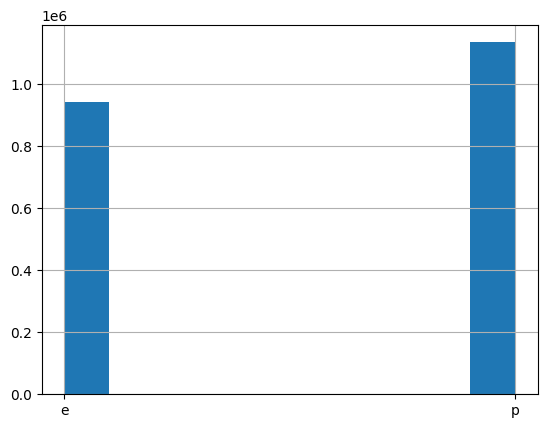

In [45]:
df_sub['class'].hist()